# Diagnostic Plots
In the previous part of this lesson, we examined a number of diagnostic measures that we can use to assess both the model assumptions and identify any data features that may indicate modelling issues. Although we discussed interpretation of their numeric values, it is more typical to *visualise* these measures in various useful ways. We already saw some indication of these visualisations earlier when calling `plot(mod)` on a model fit using `lm()`. In this part of the lesson, we will discuss all the standard plots that `R` produces, as well as some additional visualisations that can be useful for assessing the suitability of the model for any given dataset.

## Diagnostic Plots for `lm()`
When working with the `lm()` function, there are several standard plots that are produced. These are summarised in the table below, alongside their main purpose and a brief description of what we want to see if there are no problems. We will dig into each of these in more detail below.

| Plot                  | Main purpose       | What we want to see                                                |
| --------------------- | -------------------| -------------------------------------------------------------------|
| Residuals vs Fitted   | Linearity          | The pattern across the fitted values is a flat line.               |
| QQ Normal             | Residual normality | All points lying along the main diagonal.                          |
| Scale-Location        | Homoscedasticity   | An equal vertical scattering of points.                            |
| Residuals vs Leverage | Outliers           | No points within the bands in the top-right or bottom-left corners.|

By default, these plots are presented one after another, with `R` waiting for the user to hit <kbd>Enter</kbd> to move on to the next plot. If you want to see all plots together, you can run[^par-foot]  

In [25]:
options(repr.plot.width=14, repr.plot.height=12)

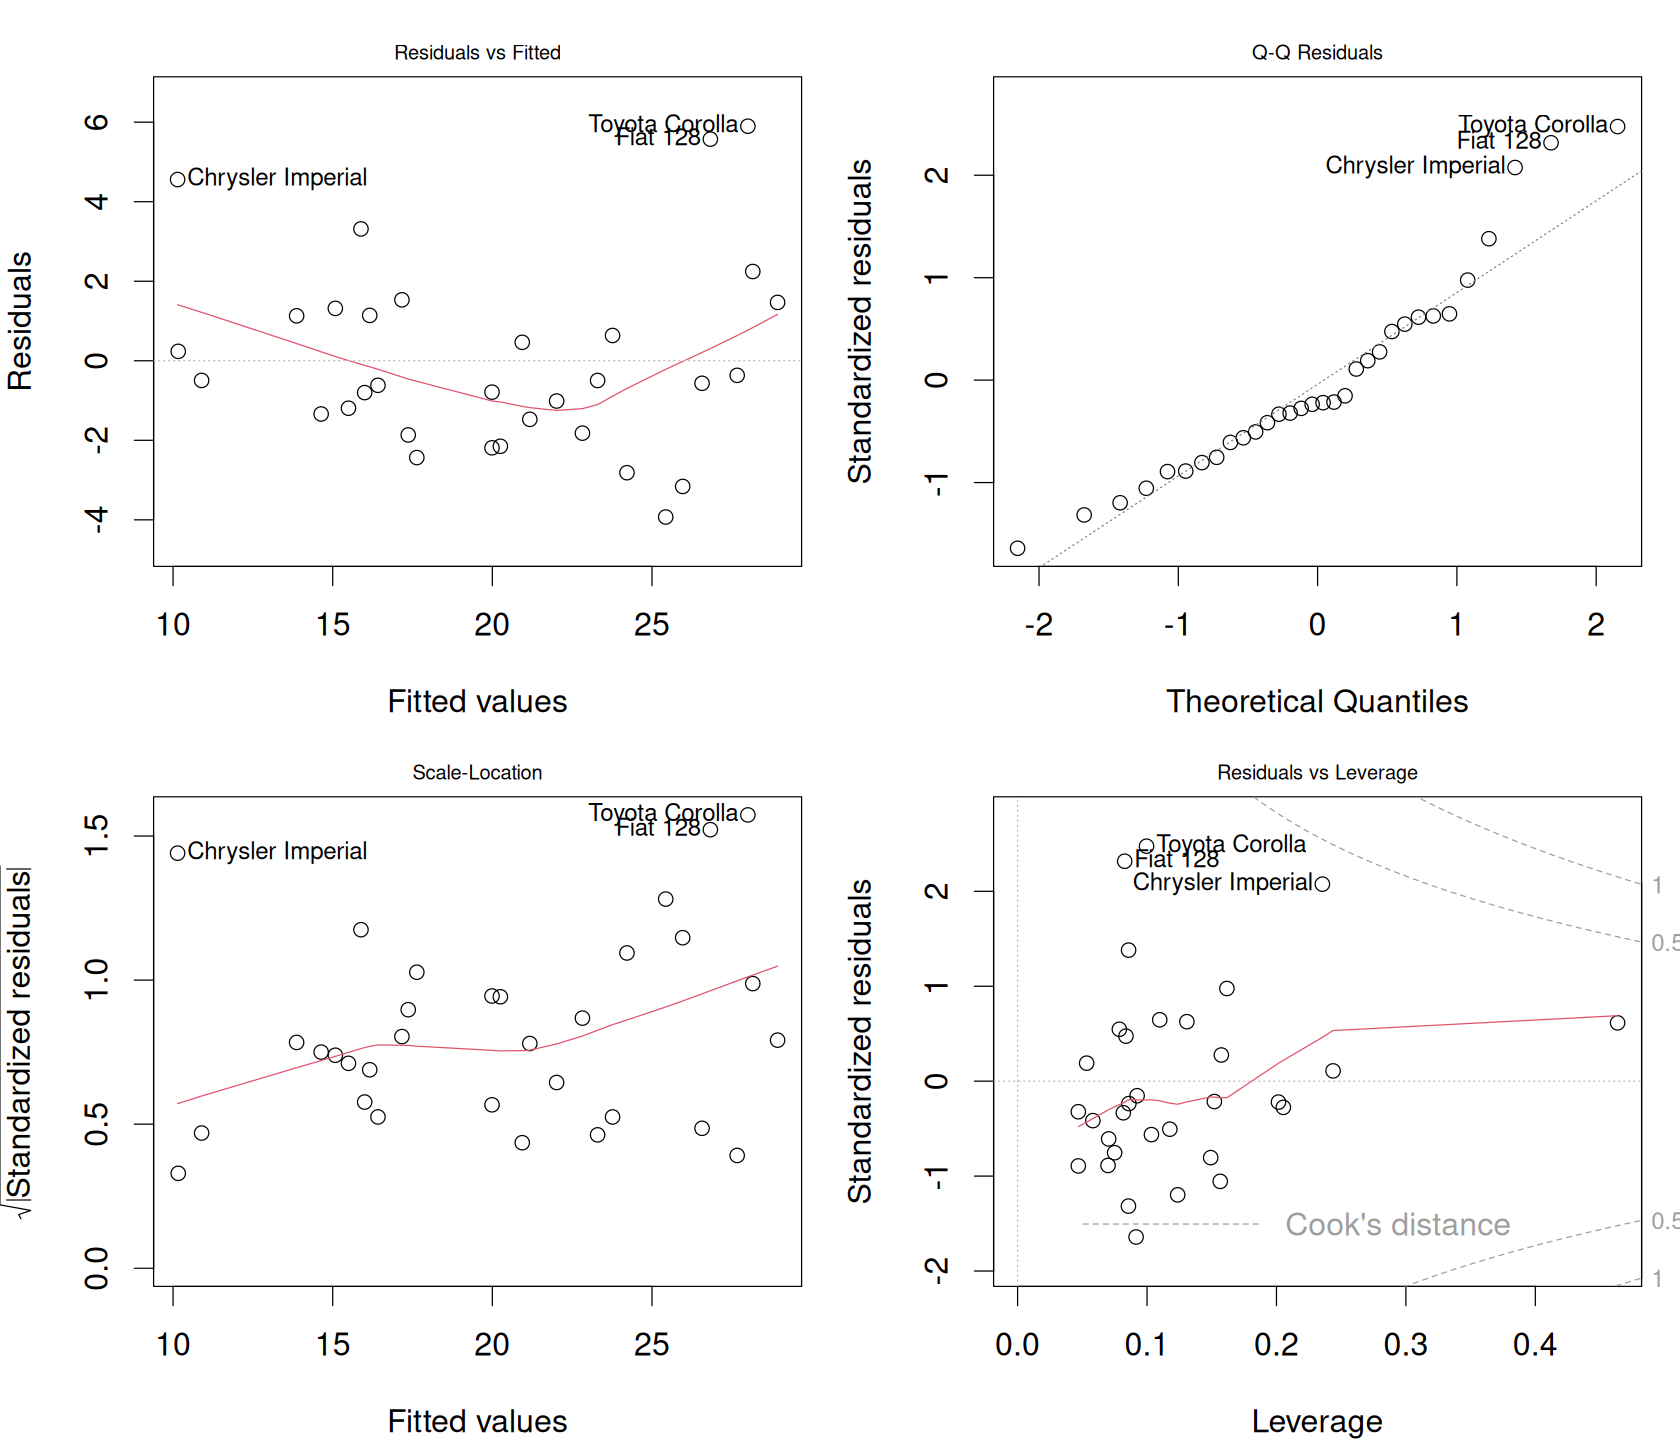

In [26]:
data(mtcars)
mod <- lm(mpg ~ wt + hp + cyl, data=mtcars)
par(mfrow=c(2,2),mar=c(4,4,2,1))
par(cex=1.6) # plot scaling
plot(mod)


### Residual vs Fitted Plot
The first plot produced by `R` is the Residuals vs Fitted plot, which you can generate on its own by calling

In [27]:
options(repr.plot.width=12, repr.plot.height=7)

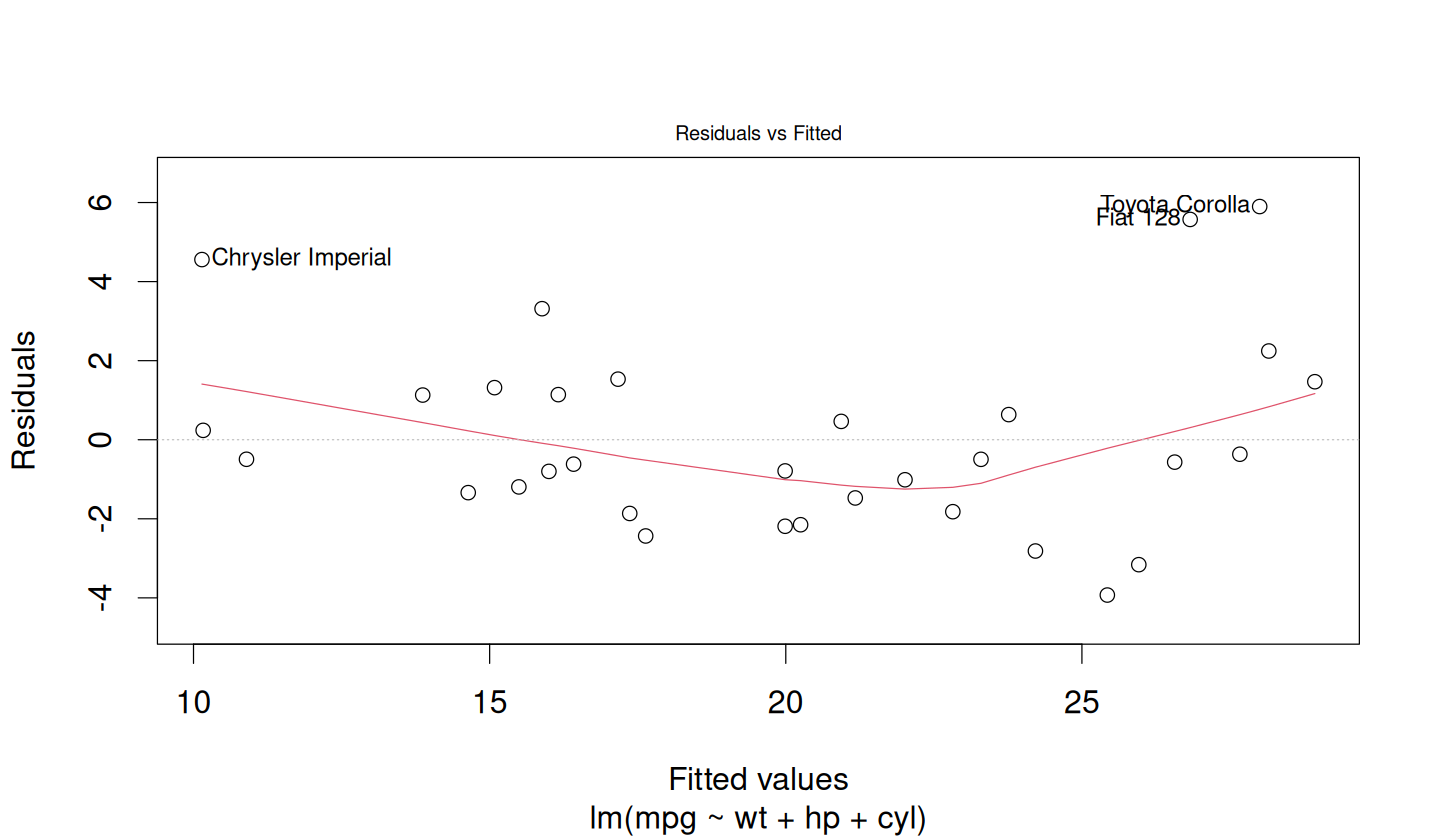

In [28]:
par(cex=1.6)
plot(mod, which=1)

This plots the fitted values along the $x$-axis with the raw residuals on the $y$-axis. The three largest absolute values of the residuals are automatically labelled, which is a behaviour you can change by setting the argument `id.n` in the call to `plot()` (e.g. `id.n=0` will turn the labelling *off*, `id.n=5` will label the 5 largest points and so on). Remember, this labelling is not based on any threshold, it is a relative measure and does not automatically denote outliers.

#### Interpreting the Plot
In terms of interpreting this plot, remember that the $y$-axis shows the *raw* residuals. So this plot is not as useful for detecting outliers. Similarly, the influence of leverage has not been removed and so assessing homoscedasticity is also not sensible here. What *is* useful here is assessing whether the assumption of a *linear relationship* appears valid. If the relationship is linear, then we expect a roughly equal scattering of residuals around the regression line, with most points falling on or near the line. In terms of the residuals, this is indicated by values close to 0, as a residual of 0 indicates a perfect fit. In this plot, this is indicated by a $y$-axis value of 0. If the data fits the regression line, then across the various predicted values we expect most points to sit around 0. This should look like a random scattering of points around the vertical 0 point.



To help discern any subtle patterns here, `R` using a method known as [LOESS smoothing](https://en.wikipedia.org/wiki/Local_regression) to draw a wiggly line through the main pattern in the residuals. The closer this is to a flat line, the more confident we feel about the linearity assumption. In the example above, there is some evidence of a depature from linearity, as the residuals dip down around the higher fitted values. Remember that the fitted values are a combination of all the predictor variables and so we would need to investigate each individually to find out where this pattern may be coming from.

#### Simulated Example
To get a sense of what this plot would look like with *extreme* depatures from linearity, the plot below shows this same diagnostic applied to simulated data with a true linear relationship (*top left*) and then three other datasets with true non-linear relationships. This lack of fit should be very clear. Although you are unlikely to see anything this extreme in a real dataset, this should give you a clear idea about what to look for in this plot.

In [29]:
options(repr.plot.width=14, repr.plot.height=12)

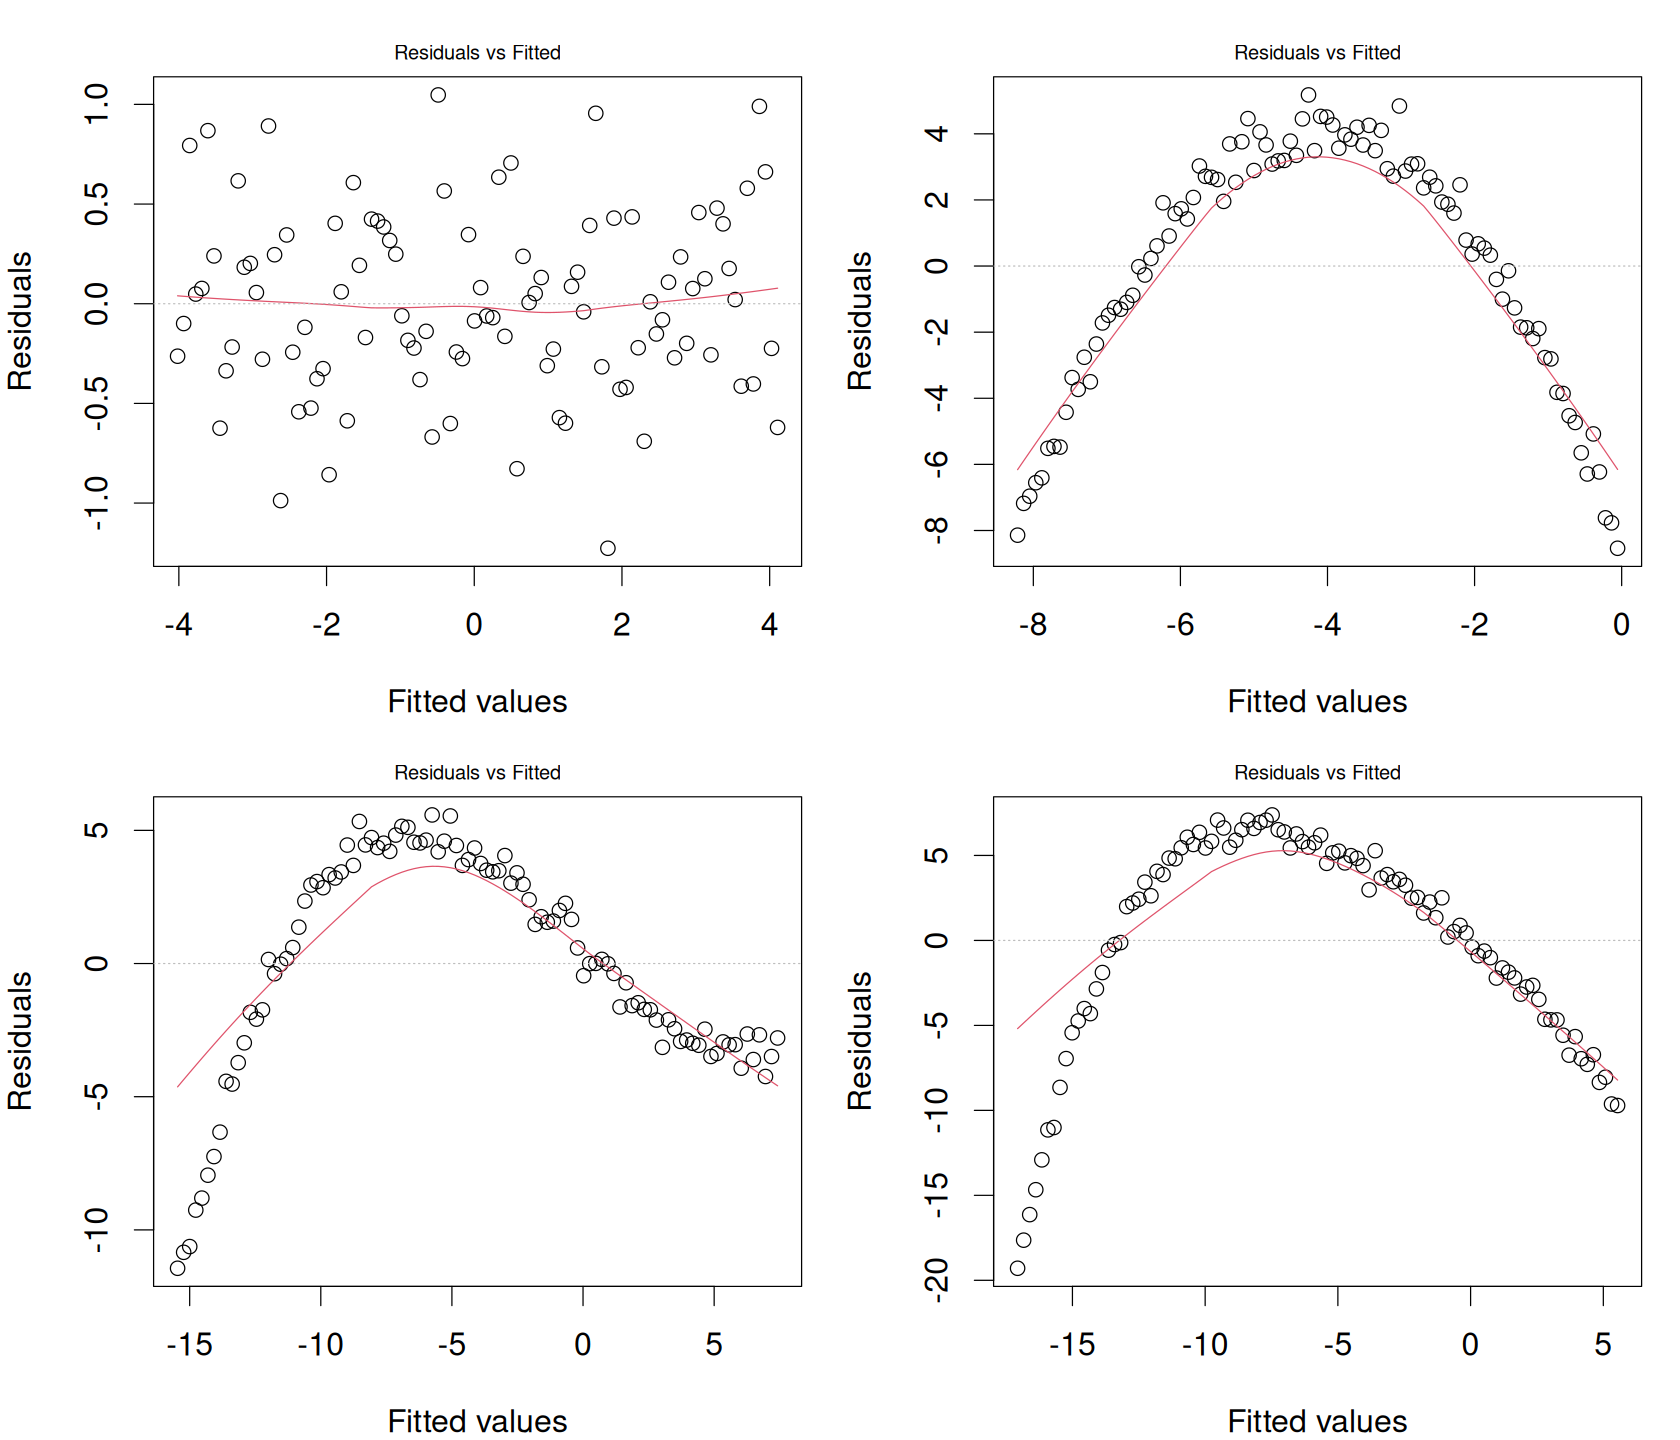

In [30]:
set.seed(123)

# Number of observations
n <- 100
x <- seq(-2, 2, length.out = n)

# True relationships (increasing polynomial degree)
y_linear    <- 2 * x + rnorm(n, sd = 0.5)
y_quadratic <- 2 * x - 3 * x^2 + rnorm(n, sd = 0.5)
y_cubic     <- 2 * x - 3 * x^2 + 1.5 * x^3 + rnorm(n, sd = 0.5)
y_quartic   <- 2 * x - 3 * x^2 + 1.5 * x^3 - 0.5 * x^4 + rnorm(n, sd = 0.5)

# Fit LINEAR models to each
fit_linear    <- lm(y_linear ~ x)
fit_quadratic <- lm(y_quadratic ~ x)
fit_cubic     <- lm(y_cubic ~ x)
fit_quartic   <- lm(y_quartic ~ x)

# Create residual plots
par(mfrow = c(2, 2), mar = c(4, 4, 2, 1))

#plot(fitted(fit_linear), resid(fit_linear),
#     main = "True: Linear | Fit: Linear",
#     xlab = "Fitted", ylab = "Residuals", pch = 19, col = "steelblue")
#abline(h = 0, lty = 2)

par(cex=1.6)
plot(fit_linear, which=1, id.n=0)
plot(fit_quadratic, which=1, id.n=0)
plot(fit_cubic, which=1, id.n=0)
plot(fit_quartic, which=1, id.n=0)




### Q-Q Residuals Plot
The logic of examining the whole distribution of errors is that they were assumed i.i.d. Unfortunately, we know this is not true of the errors. So, the shape of the residual distribution is still normal, but the variance differs due to leverage. Because of this, the logic of collapsing the residuals together to assess the full distribution somewhat falls apart. As such, we typically compare the *standardised* residuals to a normal distribution, given that the effect of leverage has been removed.

In [31]:
options(repr.plot.width=10, repr.plot.height=12)

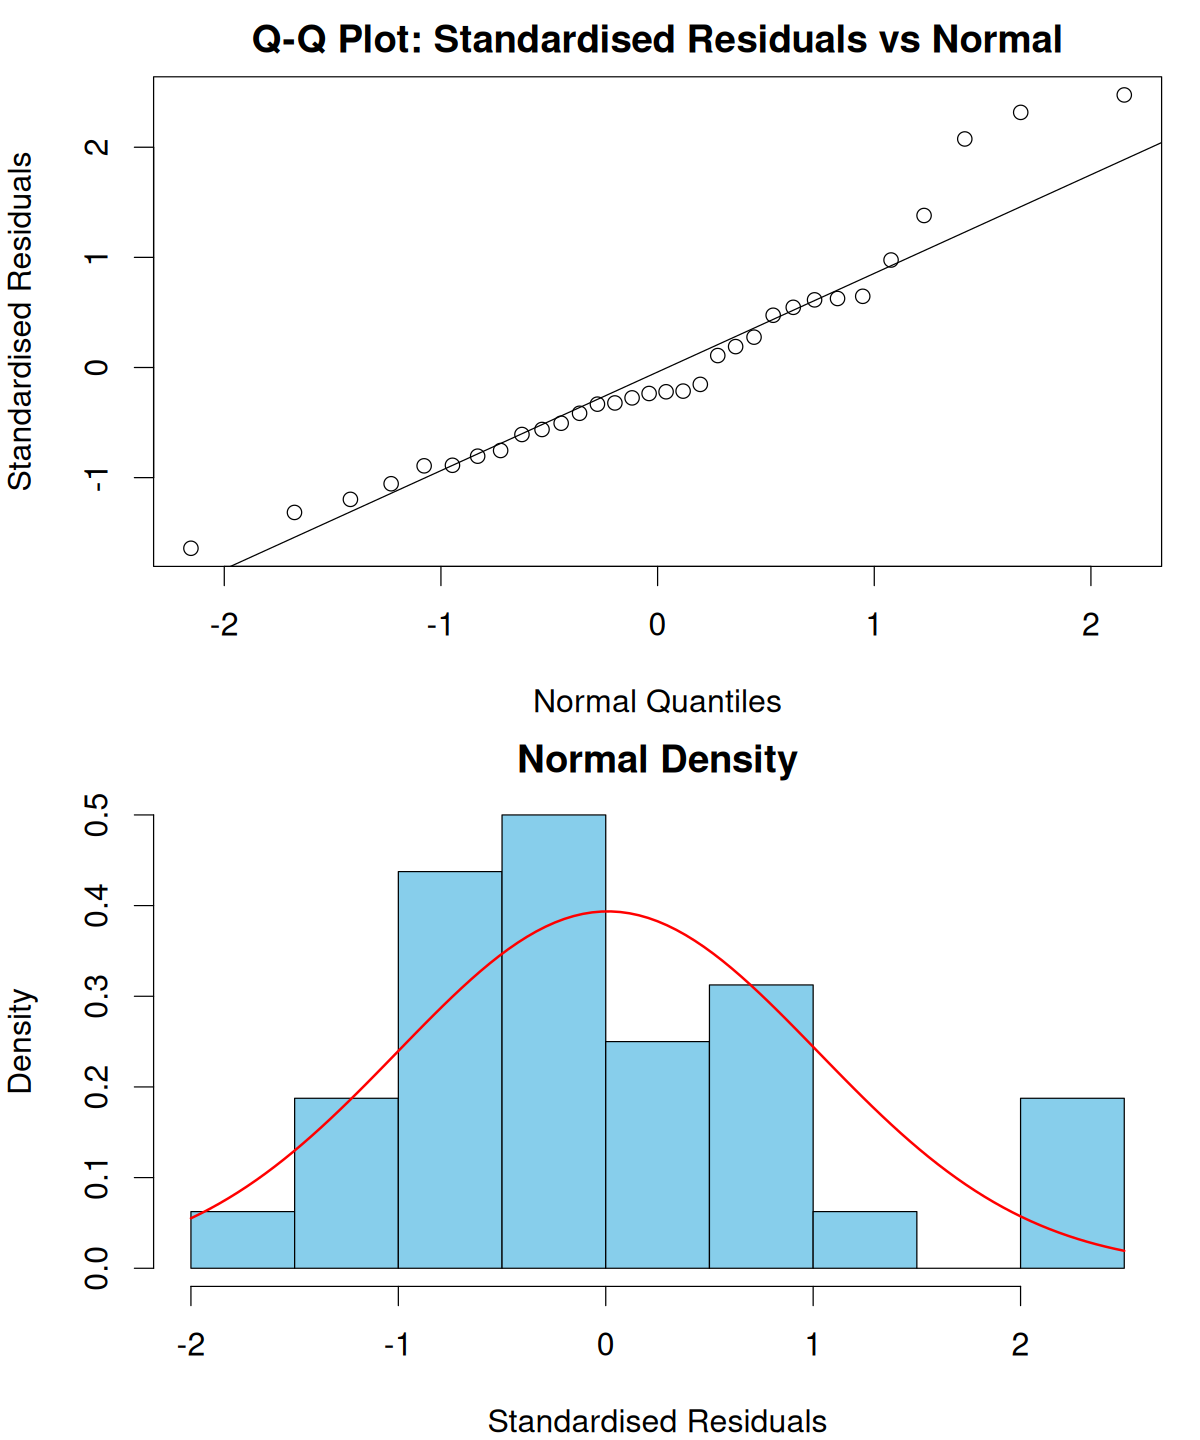

In [32]:
# Fit the model
mod       <- lm(mpg ~ wt + hp + cyl, data=mtcars)
resid.std <- rstandard(mod)

# Set up plot grid
par(mfrow=c(2,1), mar=c(4,4,2,1))
par(cex=1.6) # scaling

# Q-Q plot: Normal quantiles vs standardised residuals
qqnorm(resid.std, main="Q-Q Plot: Standardised Residuals vs Normal",
       xlab="Normal Quantiles", ylab="Standardised Residuals")
qqline(resid.std)

# Histogram + Normal density: Standardised residuals
hist(resid.std, breaks=10, probability=TRUE, main="Normal Density",
     xlab="Standardised Residuals", col="skyblue")
curve(dnorm(x, mean=mean(resid.std), sd=sd(resid.std)),
      col="red", lwd=2, add=TRUE)


#### Interpreting the Plot

#### Simulated Example

...

Remember that our ability to determine the distribution will depend upon the sample size. For example, the plots below all show random draws from a normal distribution with $n=.$. Hopefully it is clear how variable the distribution of the sample can be, even when the normality assumption is met.

In [33]:
options(repr.plot.width=12, repr.plot.height=7)

### Scale-Location Plot

### Residuals vs Leverage Plot
Cook's distance...

## Additional Plots
As well as the standard plots produced by calling `plot(mod)`, there are some additional plots that can be useful to see various assumptions or data features more clearly. Here, we will have a brief rundown of some of the more useful.

### Correlation Plots
Although previously we indicated that assessing correlation between predictors is best served by the VIF, it can be useful at times to investigate correlation as part of the initial descriptive exploration of the data, prior to fitting any model. For that purpose, a correlation plot can be useful. In the example below, we use the `corrplot` package to visualise the entire `mtcars` dataset.

In [34]:
options(repr.plot.width=12, repr.plot.height=12)

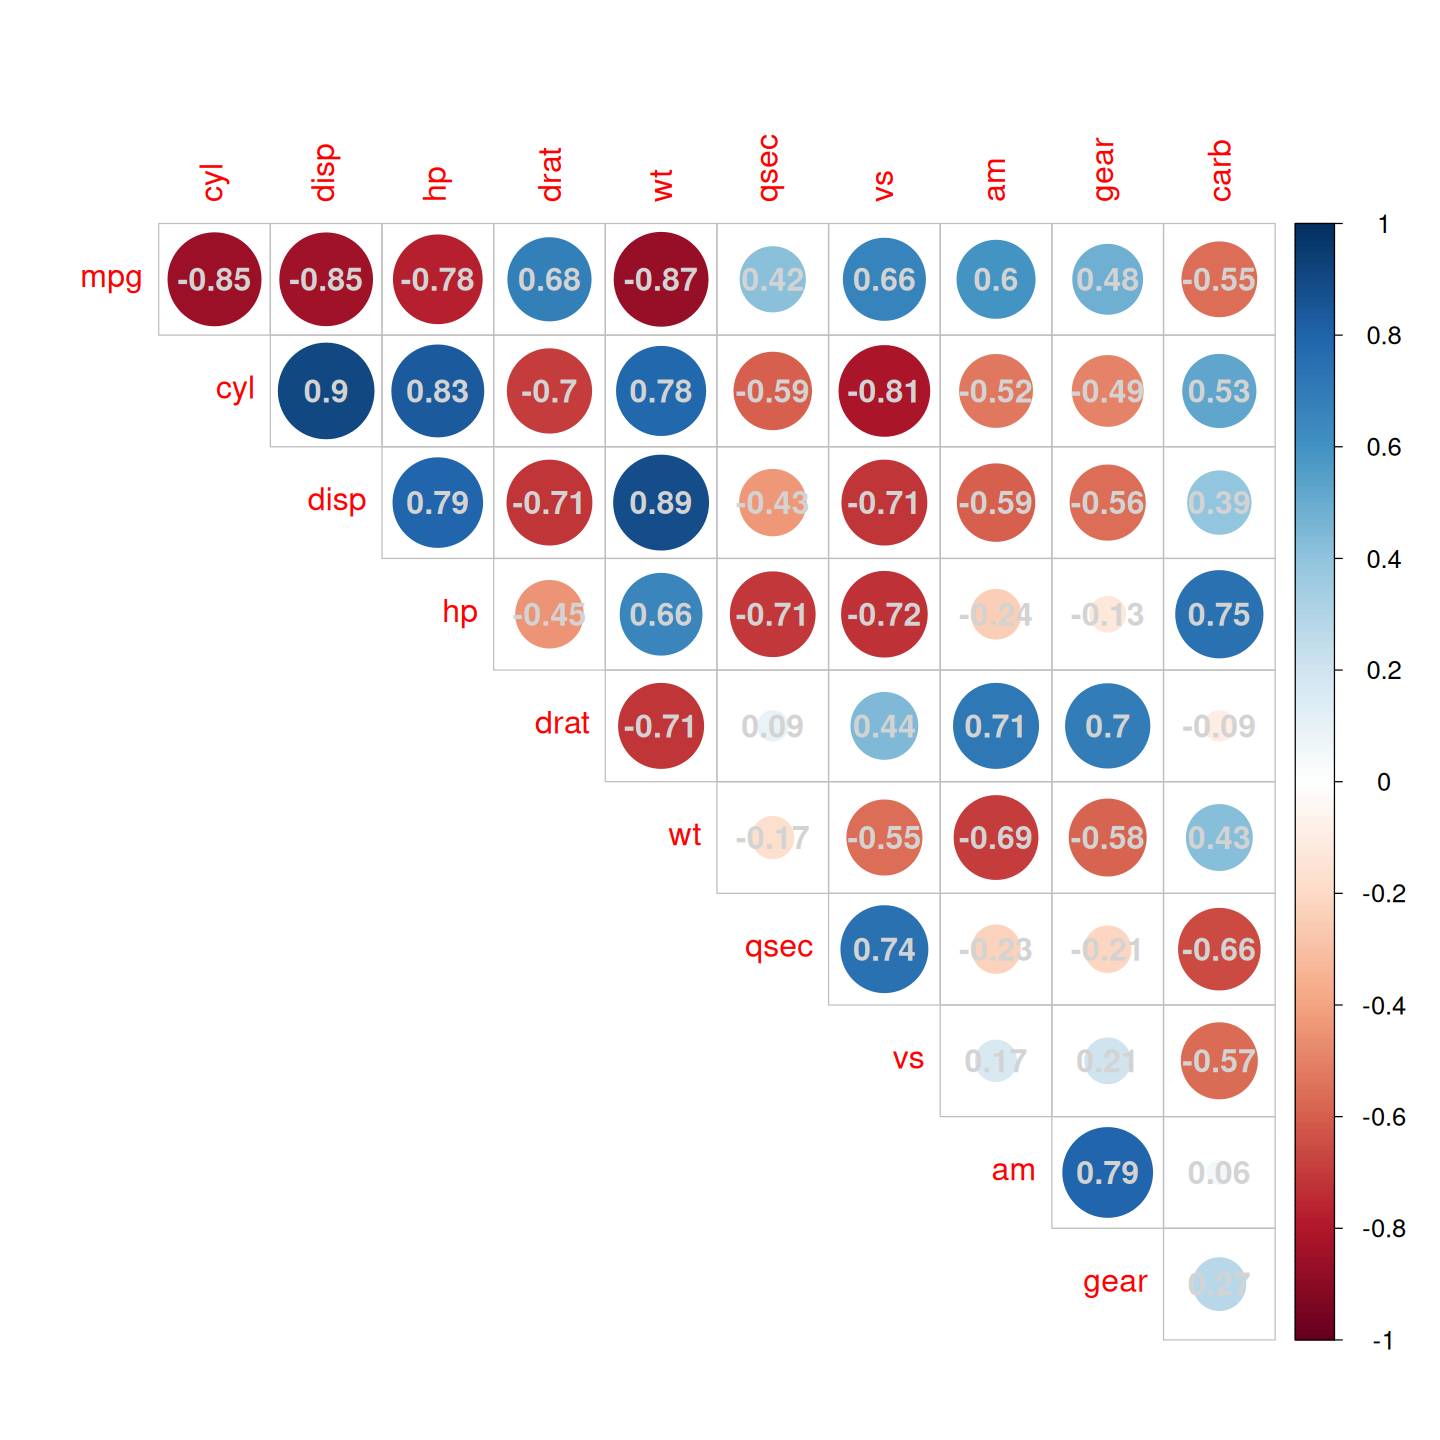

In [35]:
library('corrplot')

data(mtcars)
par(cex=1.6)
corrplot(cor(mtcars), 
        type='upper',            # just upper-diagonal
        addCoef.col='lightgrey', # add coeficient labels
        diag=FALSE)              # hide diagonal

### VIF Barplot
Once we have a model and we want to use VIF, it can be useful to visualise this as a bar chart with standard cut-offs of 5 and 10. In the example below, we include the same `wt.copy` variable as used previously.

In [36]:
options(repr.plot.width=12, repr.plot.height=7)

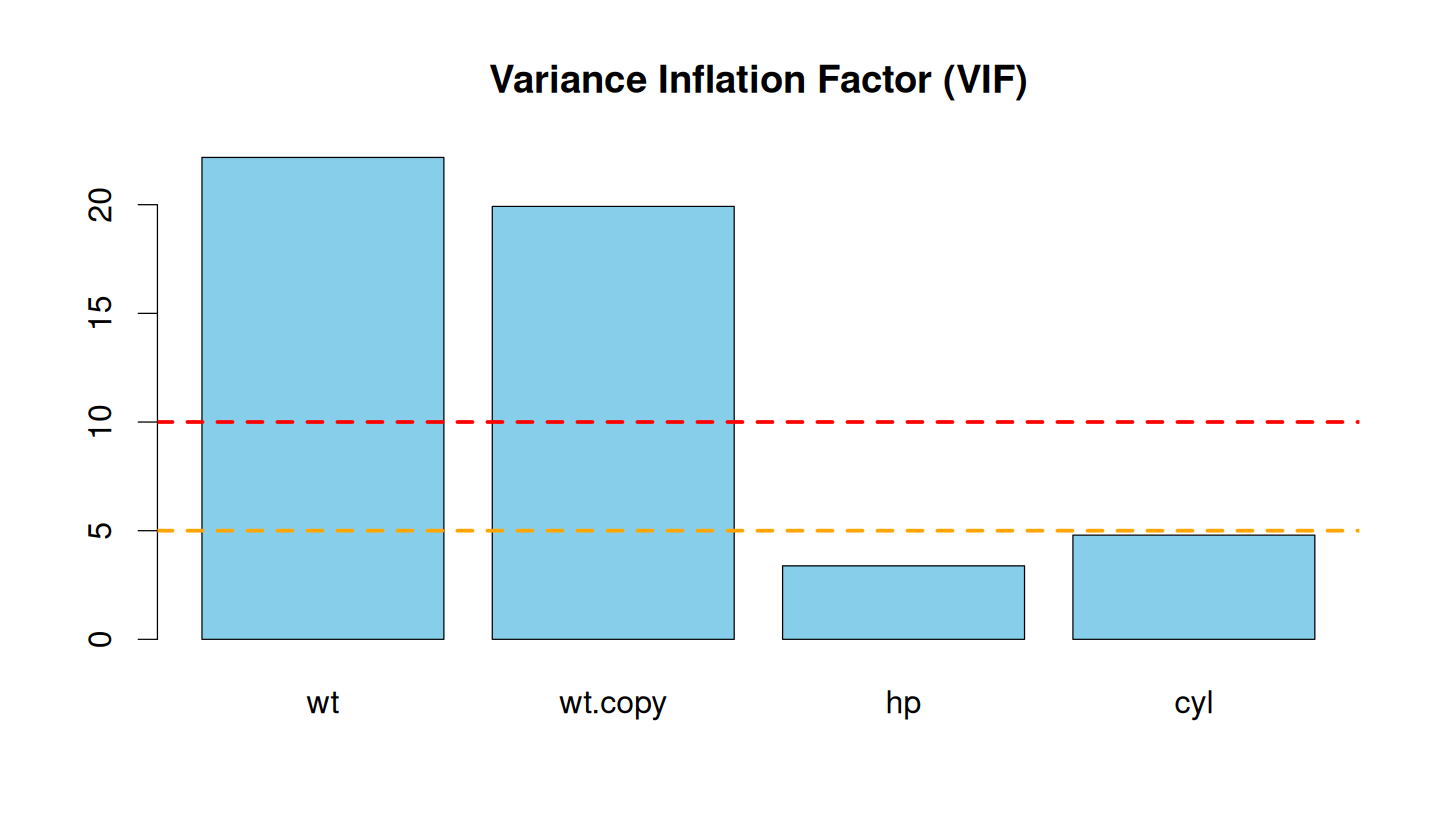

In [37]:
set.seed(666)
library(car)
data(mtcars)
wt           <- mtcars$wt
wt.copy      <- wt + rnorm(n=length(wt), mean=0, sd=0.2)
mod.multicol <- lm(mpg ~ wt + wt.copy + hp + cyl, data=mtcars)
vif.values   <- vif(mod.multicol)

par(cex=1.6)
barplot(vif.values, main = "Variance Inflation Factor (VIF)", col = "skyblue")
abline(h=5,  col="orange", lty=2, lwd=3)
abline(h=10, col="red",    lty=2, lwd=3)

### Influence Plot
Another useful plot included as part of the `car` package is the *influence* plot, where studentised residuals, leverage, Cook's distance and standard thresholds for extreme points are all combined into the same plot. As an example:

In [38]:
options(repr.plot.width=12, repr.plot.height=9)

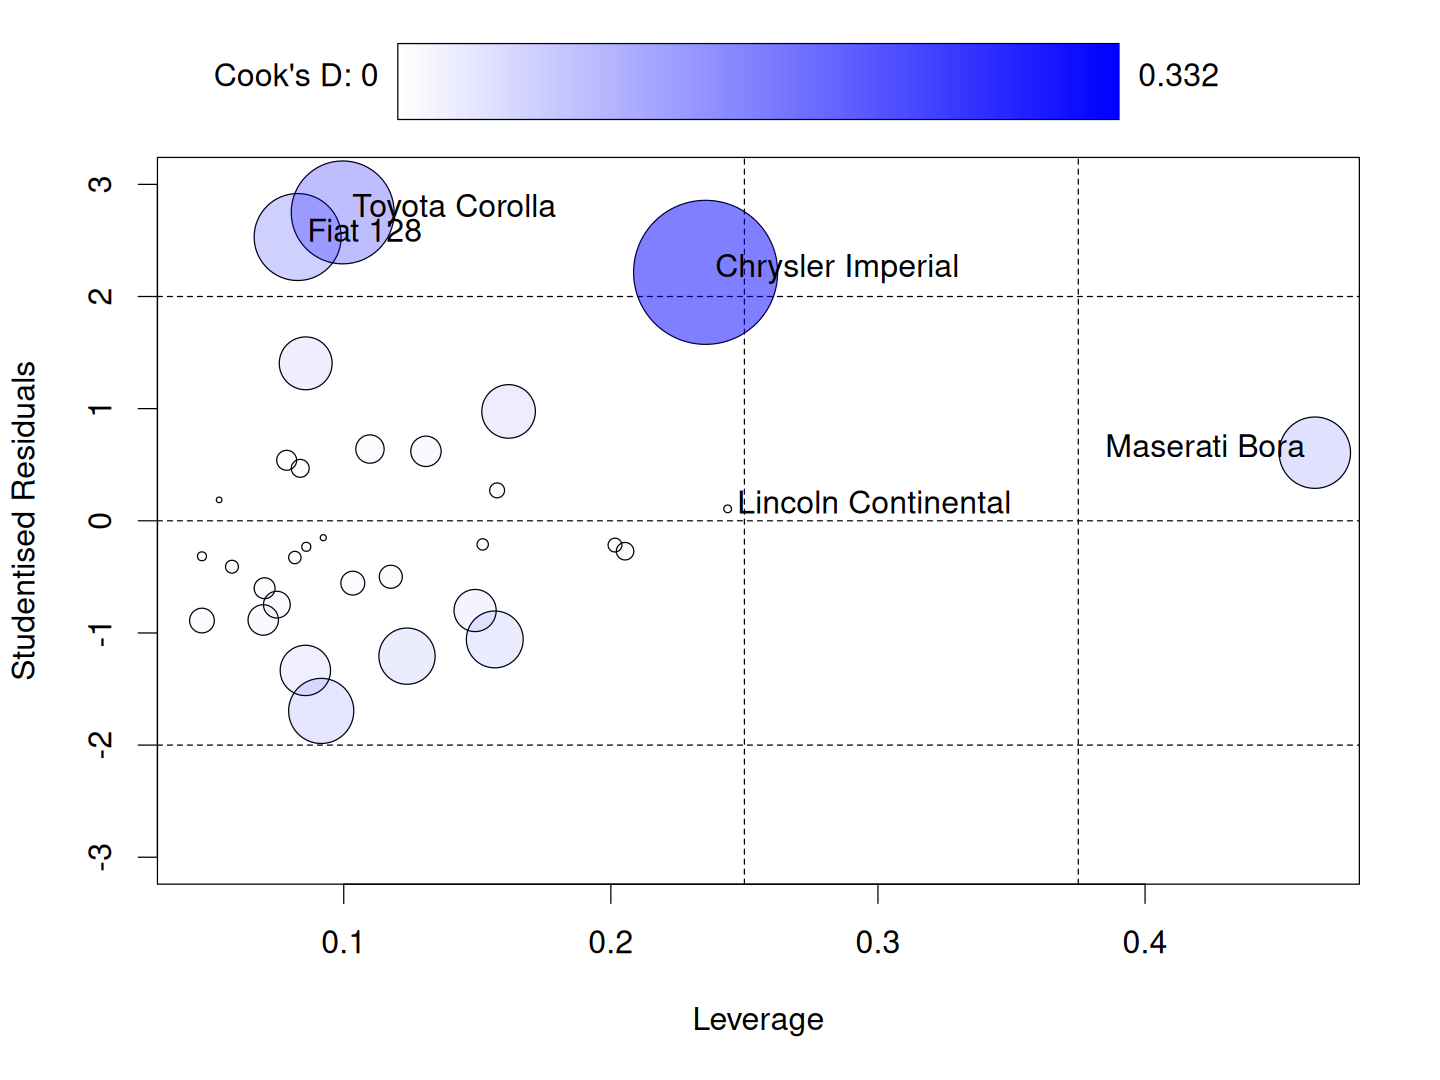

In [39]:
par(cex=1.6)
note <- influencePlot(mod, 
                ylim=c(-3,3), # Make thresholds visible (DON'T DO THIS NORMALLY)
                xlab="Leverage", 
                ylab="Studentised Residuals")

Here we can see leverage plotted against the *studentised* resdiduals, with the magnitude of Cook's Distance displayed as bubbles of different sizes around each point. The mapping between these bubbles and Cook's Distance is shown by the colour bar at the top. Looking at the top value of the colourmap, we can see it is below our lower heuristic of $D > 0.5$, meaning we have little concern here in terms of Cook's distance. This agrees with what we saw earlier, as no points fell within the contour lines of $D = 0.5$ and $D = 1$. In addition, heuristics of 2 and -2 are shown vertically for outliers, with heuristics of $2\frac{p}{n}$ and $3\frac{p}{n}$ shown horizontally for leverage. Notable points have also been labelled and are returned as a data frame

In [40]:
print(note)

                      StudRes        Hat        CookD
Lincoln Continental 0.1065775 0.24373270 0.0009486833
Chrysler Imperial   2.2153833 0.23547715 0.3316313326
Fiat 128            2.5303244 0.08274176 0.1210330843
Toyota Corolla      2.7498370 0.09961207 0.1694339333
Maserati Bora       0.6073374 0.46356582 0.0815260489


How these points are chosen requires a little explanation. The labels are based on the top two points for each of the influence measures. For the studentised residuals, the two largest points are the Toyota Corolla and the Fiat 128. For the leverage values, the two largest points are the Maserati Bora and the Lincoln Continental. For Cook's Distance, the two largest points are Chrysler Imperial and the Toyota Corolla. So this gives five unique data points (because the Toyota appears *twice*). The labelling in the plot can then be thought of as the two largest values horizontally, the two largest vertically, and the two largest in terms of their bubble size. Of note is that this will happen irrespective of whether any of the data points are above any threshold of concern on any measure. For instance, none of these data have Cook's D > 0.5, despite the function still labelling the top two values. As such, we need to use the labelling in conjunction with the heuristics shown in the plot.

### Added-variable Plots

In [41]:
options(repr.plot.width=14, repr.plot.height=10)

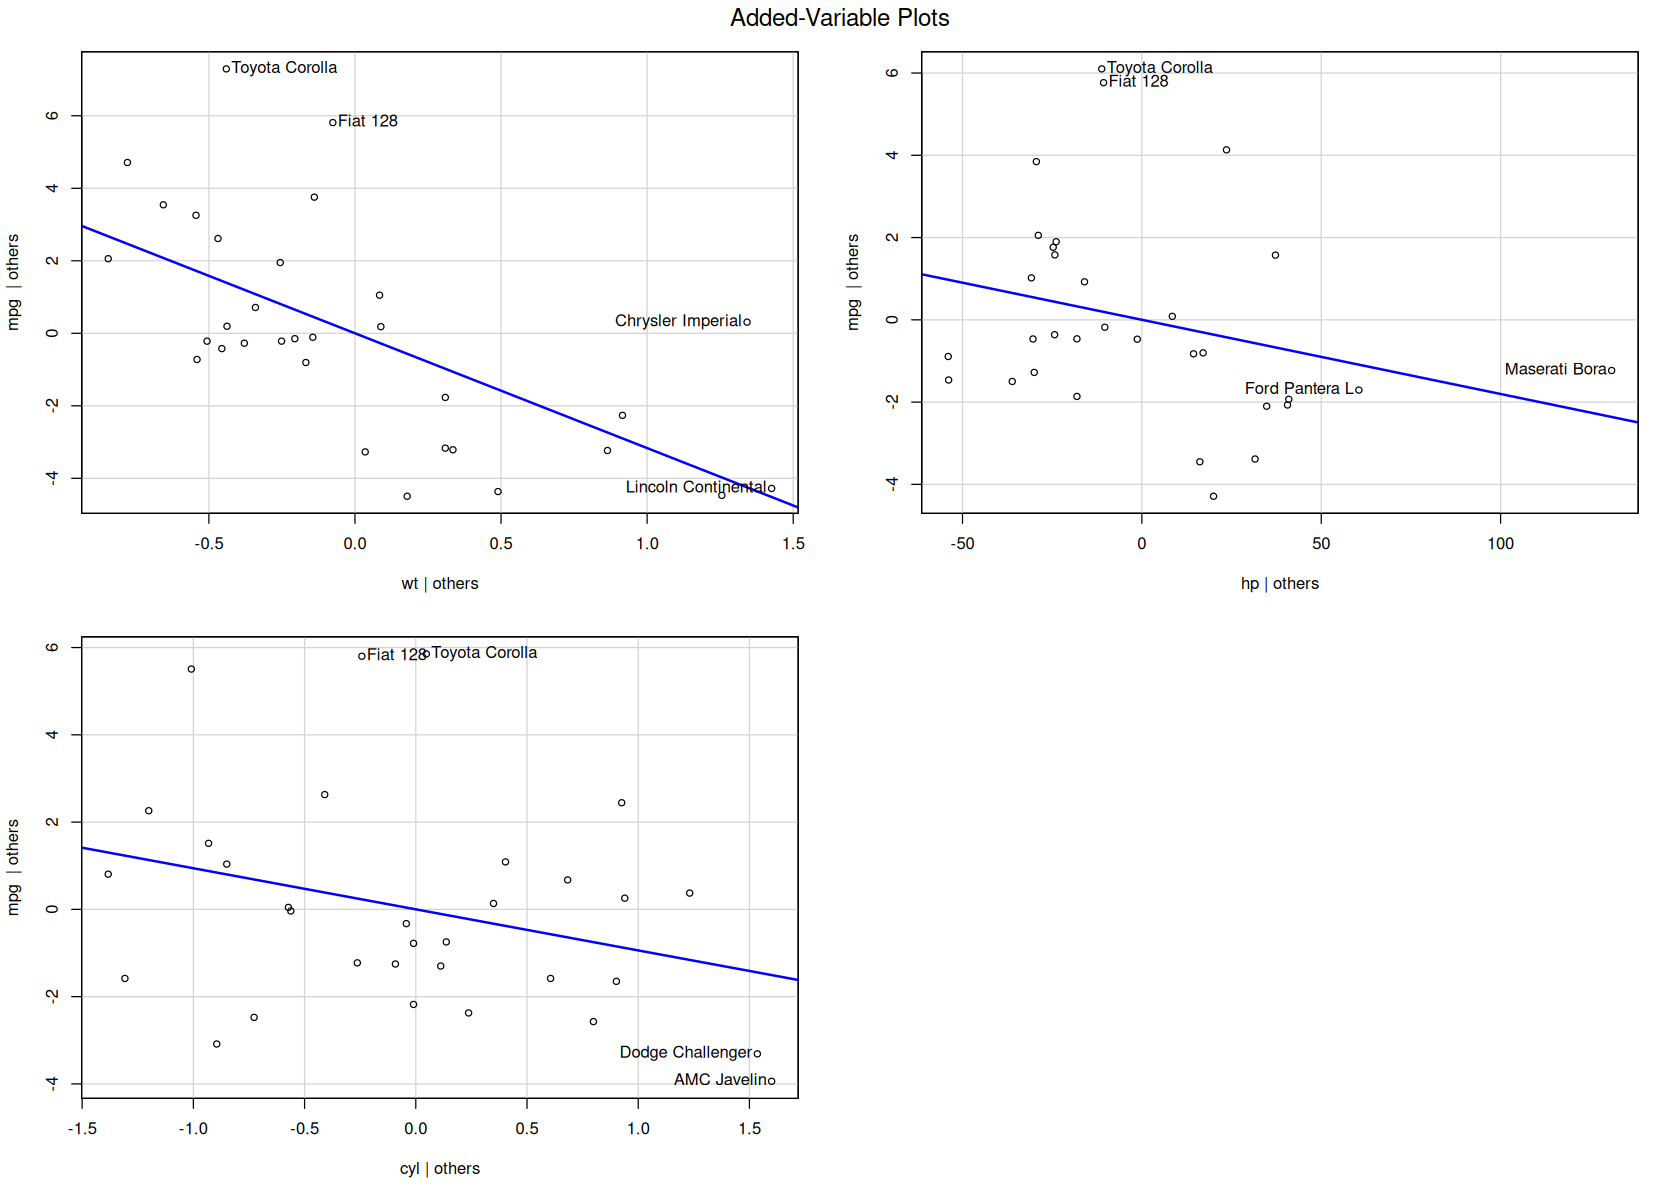

In [42]:
avPlots(mod)

### Effects Plots
As an alternative to added-variable plots, we can instead create *effects* plots. Here, rather than removing the influence of other effects in the model, we simply fix them at some constant value. For instance, in plotting the effects of $x_{i1}$ in the following model

$$
y_{i} = \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + \beta_{3}x_{i3} + e_{i}
$$

we can calculate predicted values by setting $x_{i2}$ and $x_{i3}$ to their means

$$
\hat{y}^{(x_1)}_{i} = \beta_{0} + \beta_{1}x_{i1} + \beta_{2}\bar{x}_{2} + \beta_{3}\bar{x}_{3}.
$$

In this way, we do not remove the other variables, we just keep them fixed so that only the variable of interest changes. The advantage of doing this is that we can examine the effect without the need to residualise the data, which can provide a more inuitive display of the model. For instance, we can make these types of plots using the `effects` package in `R`. For instance: 

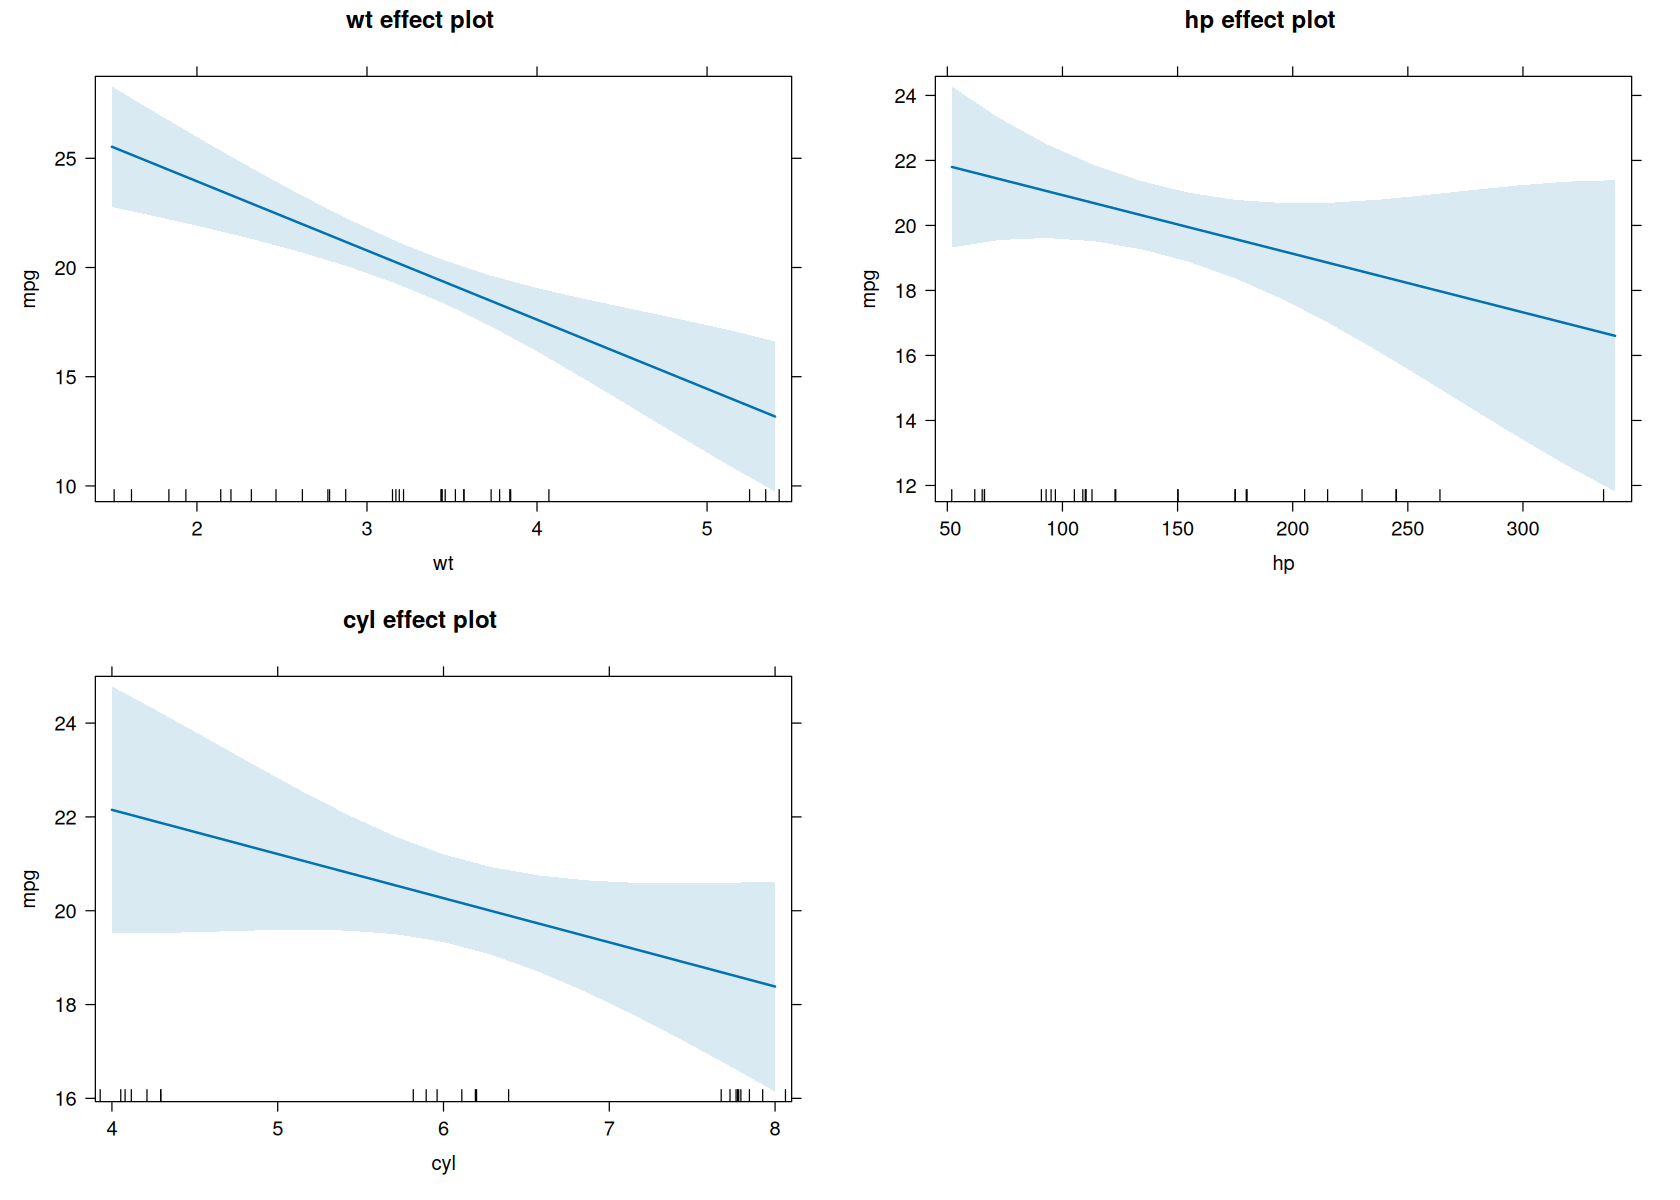

In [43]:
library(effects)
plot(allEffects(mod))

Notice that this does not seem too dissimilar from the added-variable plots, though the $x$ and $y$ axis scales remain in the original units of the data. The `effects` package also draws a confidence band around the regression slope. This is calculated for each value on the $x$-axis by evaluating ... Importantly, this highlights the fact that certainty around the value of the regression slope depends upon how much data we have for different values of the predictor. This means that the band is *narrower* in places where there is both a greater concentration of data and where points are *closer* to the model prediction. 

These plots can also be advanced further by taking the effects predictions and adding back in the original residuals from the model. This allows us to see how close the model fit is to the data. The `effects` package then takes this further and draws a smooth curve through the pattern of residuals. This allows us to see whether there are any non-linear patterns that are not being captured by the model  

In [44]:
options(warn=-1) # suppress warnings from LOESS

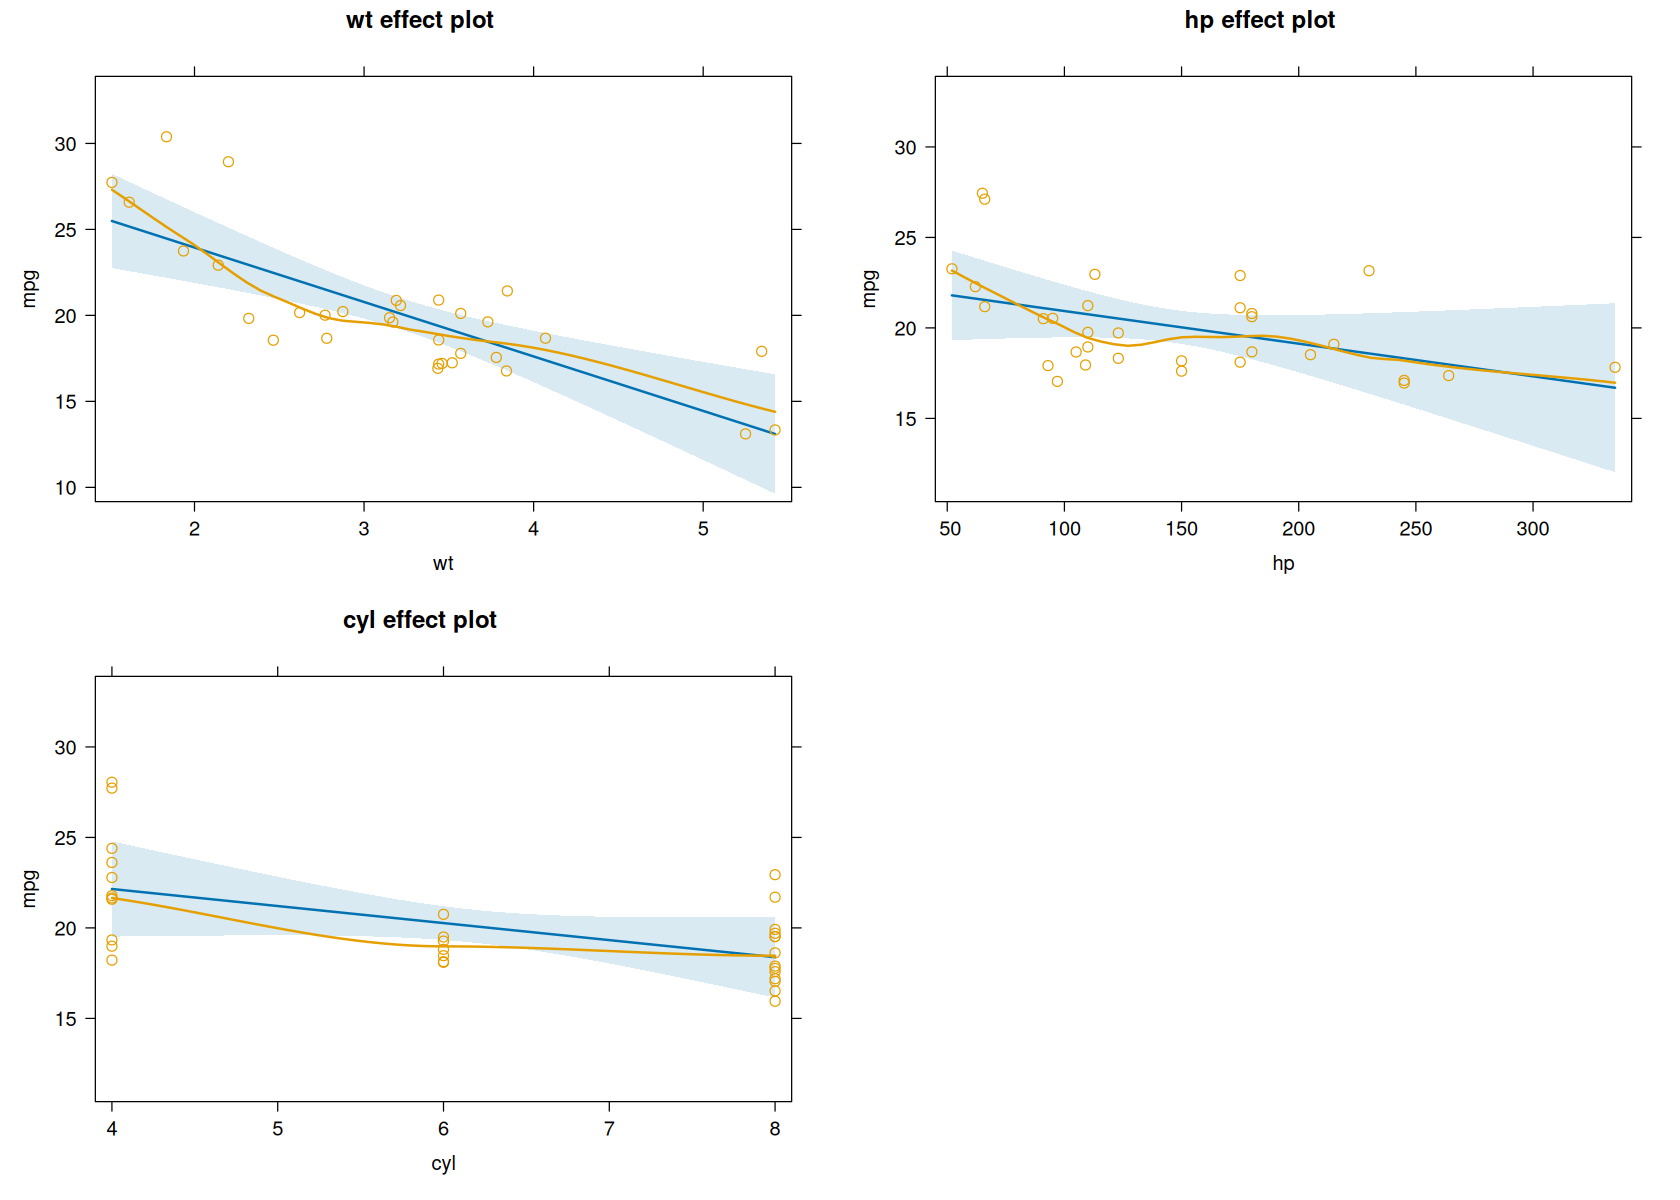

In [45]:
library(effects)
plot(allEffects(mod,residuals=TRUE))

Here we can start to see why this is useful, as there is some evidence of possible non-linearity in these relationships, particularly with `wt`. In addition, notice that the effects plot has retained the more categorical nature of `cyl`, which was removed when this variable was adjusted for the added-variable plots. As an aside, if you ever want to turn the smoothing curve *off*, you can use

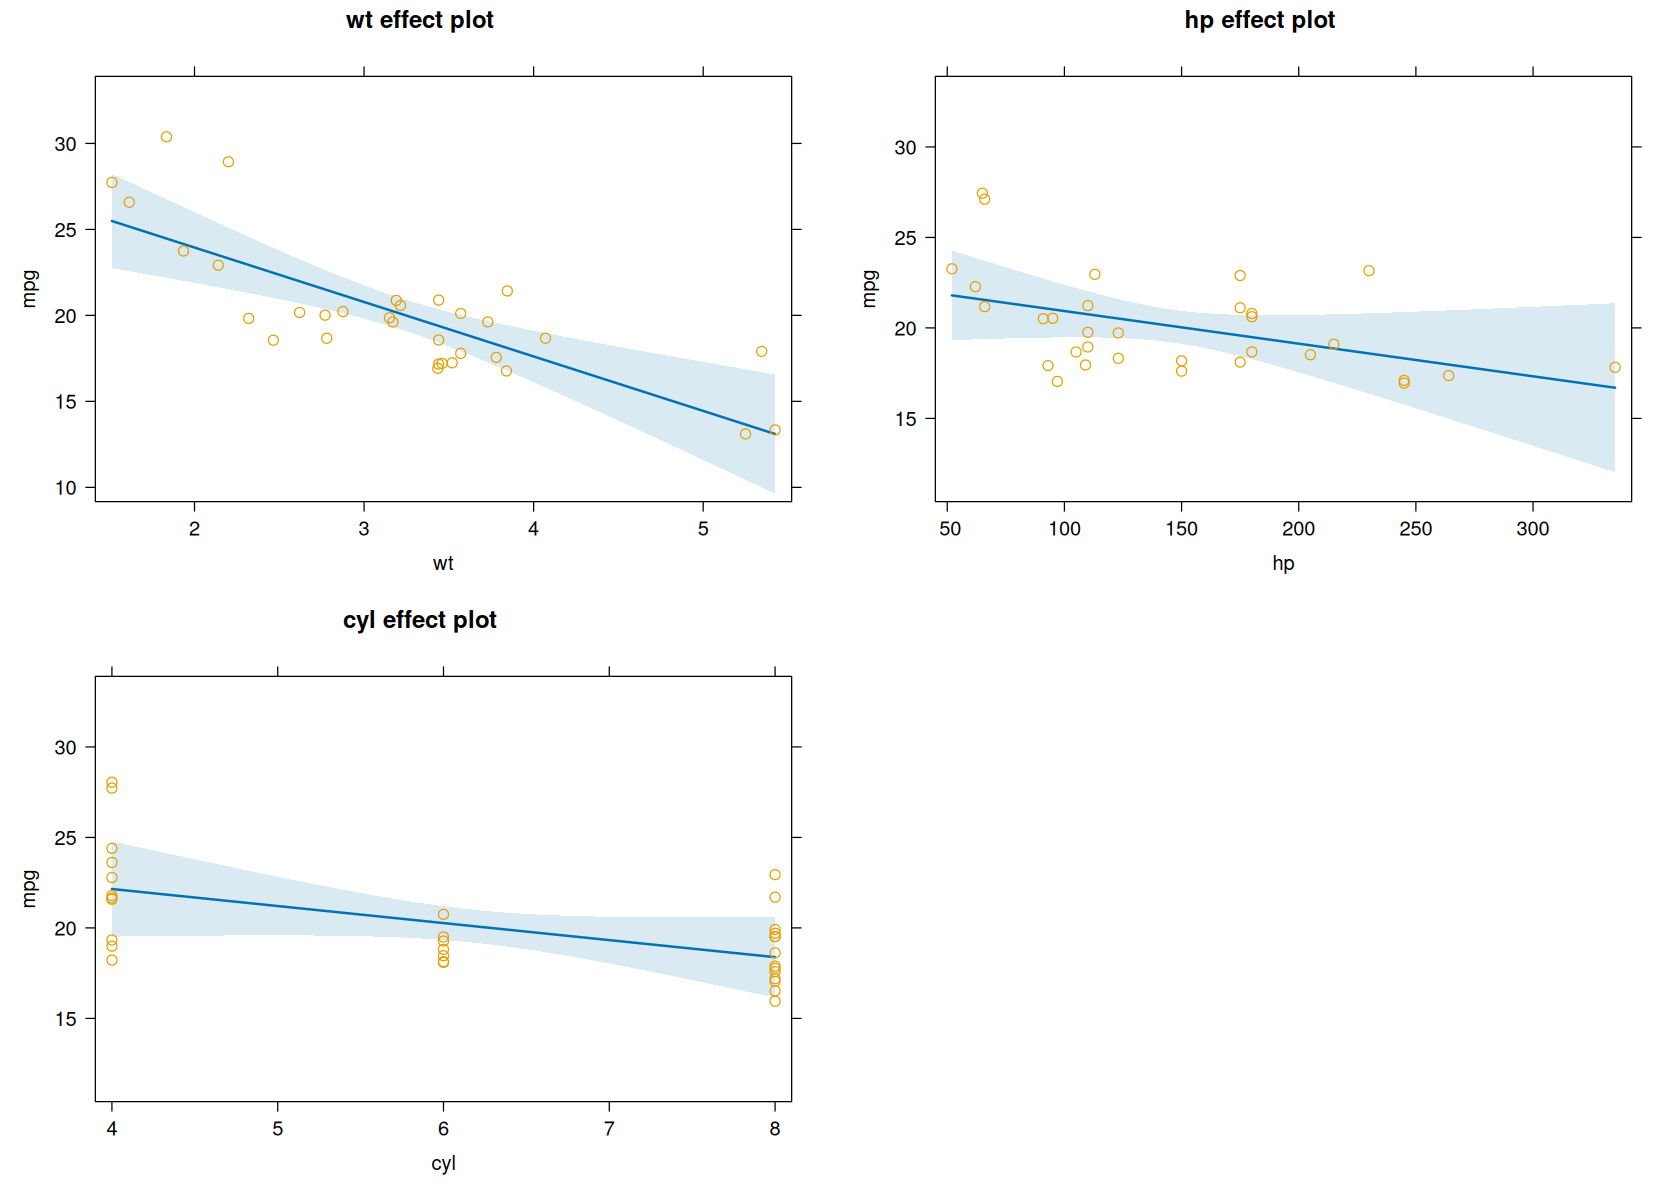

In [46]:
plot(allEffects(mod, residuals=TRUE), partial.residuals=list(smooth=FALSE))

In [47]:
options(warn=0) # turning warnings back on to be safe

Effects plots will become increasingly relevant when we discuss visualising results from ANOVA and ANCOVA models, particularly when those models contain more complex interaction terms. These types of plots can also be defined for more complex linear models, such as generalised linear models and mixed-effects models. These plots and this package will therefore become an invaluable tool for understanding the effects from our models, as we progress on this course.

[^VIF-foot]: Note that some authors suggest VIF > 10 to be the marker for concerning multicollinearity. Here, we would recommend the more cautious approach of using VIF > 5.

[^NASA-foot]: [Faraway (2005)](https://www.utstat.toronto.edu/~brunner/books/LinearModelsWithR.pdf) provides a real-world example of why this is *not* good practise. This concerns the delay in the discovery of the hole in the Ozone layer due to NASA's automatic data analysis algorithms discarding very low readings assumed to be mistakes.

[^par-foot]: You can reset this by calling `par(mfrow=c(1,1))`, otherwise all your future plots in the same `R` session will be placed into a 2 x 2 grid.